#**Import** **necessary** **packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import random

random.seed(42)

In [4]:
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.9.2


#**Import dataset**

In [5]:
data = pd.read_excel('/content/drive/MyDrive/humayun bhai thesis/merged.xlsx', index_col=0)
data

,Ship_Rule_Length,Ship_Breadth,Ship_Draft,RINA_Keel_Plate_Weight,RINA_Bottom_Plate_Weight,RINA_Inner_Bottom_Plate_Weight,RINA_Side_Shell_Plate_Weight,RINA_Bulkhead_Weight,RINA_Main_Deck_Weight,BV_Keel_Plate_Weight,...,KR_Inner_Bottom_Plate_Weight,KR_Side_Shell_Plate_Weight,KR_Bulkhead_Weight,KR_Main_Deck_Weight,LR_Keel_Plate_Weight,LR_Bottom_Plate_Weight,LR_Inner_Bottom_Plate_Weight,LR_Side_Shell_Plate_Weight,LR_Bulkhead_Weight,LR_Main_Deck_Weight
0,80.346243,14.608408,4.173831,5.911089,54.427676,89.757017,26.578350,5.915969,52.334304,5.911089,...,79.784015,26.578350,6.901963,45.792516,5.911089,61.231136,89.757017,23.625200,6.901963,52.334304
1,65.600258,11.927320,3.407806,4.826224,36.282712,59.834044,17.717725,3.943718,34.887223,4.826224,...,53.185817,17.717725,4.601004,30.526320,4.826224,40.818051,59.834044,15.749089,4.601004,34.887223
2,71.600704,13.018310,3.719517,5.267678,43.223828,71.280681,21.107240,4.698176,41.561373,5.267678,...,63.360605,21.107240,5.481205,36.366201,5.267678,48.626806,71.280681,18.761991,5.481205,41.561373
3,70.357058,12.792192,3.654912,5.176183,41.735342,68.826011,20.380377,4.536386,40.130137,5.176183,...,61.178676,20.380377,5.292451,35.113870,5.176183,46.952260,68.826011,18.115890,5.292451,40.130137
4,82.675309,15.031874,4.294821,6.082439,57.628896,95.036168,28.141583,6.263922,55.412400,6.082439,...,84.476594,28.141583,7.307909,48.485850,6.082439,64.832508,95.036168,25.014740,7.307909,55.412400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,79.612271,14.474958,4.135702,5.857091,53.437811,88.124625,26.094975,5.808376,51.382511,5.857091,...,78.333000,26.094975,6.776439,44.959697,5.857091,60.117538,88.124625,23.195534,6.776439,51.382511
4996,72.595725,13.199223,3.771207,5.340882,44.433522,73.275596,21.697963,4.829663,42.724541,5.340882,...,65.133863,21.697963,5.634607,37.383973,5.340882,49.987712,73.275596,19.287078,5.634607,42.724541
4997,77.609389,14.110798,4.031657,5.709738,50.782862,83.746332,24.798499,5.519799,48.829675,5.709738,...,74.441184,24.798499,6.439765,42.725966,5.709738,57.130720,83.746332,22.043111,6.439765,48.829675
4998,88.880584,16.160106,4.617173,6.538962,66.604327,109.837606,32.524503,7.239499,64.042622,6.538962,...,97.633428,32.524503,8.446082,56.037294,6.538962,74.929867,109.837606,28.910669,8.446082,64.042622


In [6]:
dataset = data.sample(frac=1)
# dataset.to_excel('sample.xls')

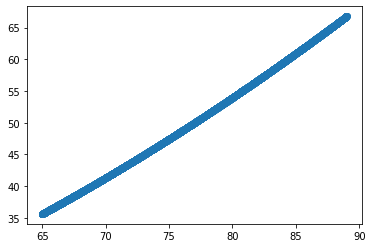

In [7]:
plt.scatter(data.iloc[:,0], data.iloc[:,10])

#**Clean the dataset (CL)**

In [8]:
# dataset = dataset[['airfoil','re', 'alpha', 'cd']].copy()

In [9]:
# dataset

In [10]:
# dataset["airfoil"].replace({"naca_0012": 1, "naca_0015": 2, "naca_0018": 3}, inplace=True)
# dataset.head(10)

In [11]:
# dataset["cd"] = dataset.cd.astype(float)

In [12]:
# dataset

#**Split the data into train and test**

In [13]:
train_dataset = dataset.sample(frac=0.9, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [14]:
train_dataset.shape

(4500, 45)

In [15]:
test_dataset.shape

(500, 45)

In [16]:
# Cl_train_dataset = Cl_data.sample(frac=0.8, random_state=0)
# Cl_test_dataset = Cl_data.drop(Cl_train_dataset.index)

In [17]:
# Cl_train_dataset

#**Inspect the data**

In [18]:
# sns.pairplot(train_dataset[['Re','alpha', 'CD']], diag_kind='kde')

#**Split features from labels**

In [19]:
# train_features = train_dataset.copy()
# test_features = test_dataset.copy()

train_features = train_dataset.iloc[:,0:3]
train_labels = train_dataset.iloc[:,3:]

test_features = test_dataset.iloc[:,0:3]


test_labels = test_dataset.iloc[:,3:]
# train_labels = train_features.pop([['Keel_Plate_Weight', 'Bottom_Plate_Weight', 'Inner_Bottom_Plate_Weight', 'Side_Shell_Plate_Weight']])
# test_labels = test_features.pop([['Keel_Plate_Weight', 'Bottom_Plate_Weight', 'Inner_Bottom_Plate_Weight', 'Side_Shell_Plate_Weight']])


In [20]:
test_features.shape

(500, 3)

In [21]:
# train_features.drop('CL', axis=1, inplace=True)
# test_features.drop('CL', axis=1, inplace=True)
# train_features.drop('CD', axis=1, inplace=True)
# test_features.drop('CD', axis=1, inplace=True)

In [22]:
test_features.shape

(500, 3)

In [23]:
train_labels

,RINA_Keel_Plate_Weight,RINA_Bottom_Plate_Weight,RINA_Inner_Bottom_Plate_Weight,RINA_Side_Shell_Plate_Weight,RINA_Bulkhead_Weight,RINA_Main_Deck_Weight,BV_Keel_Plate_Weight,BV_Bottom_Plate_Weight,BV_Inner_Bottom_Plate_Weight,BV_Side_Shell_Plate_Weight,...,KR_Inner_Bottom_Plate_Weight,KR_Side_Shell_Plate_Weight,KR_Bulkhead_Weight,KR_Main_Deck_Weight,LR_Keel_Plate_Weight,LR_Bottom_Plate_Weight,LR_Inner_Bottom_Plate_Weight,LR_Side_Shell_Plate_Weight,LR_Bulkhead_Weight,LR_Main_Deck_Weight
2120,4.793738,35.795911,59.031258,17.480009,3.890805,34.419145,4.793738,35.795911,59.031258,17.480009,...,52.472229,17.480009,4.539273,30.116752,4.793738,40.270400,59.031258,15.537786,4.539273,34.419145
1355,5.026431,39.355393,64.901221,19.218190,4.277700,37.841724,5.026431,39.355393,64.901221,19.218190,...,57.689975,19.218190,4.990650,33.111508,5.026431,44.274817,64.901221,17.082835,4.990650,37.841724
3568,5.718519,50.939180,84.004116,24.874833,5.536789,48.979980,5.718519,50.939180,84.004116,24.874833,...,74.670325,24.874833,6.459588,42.857483,5.718519,57.306577,84.004116,22.110963,6.459588,48.979980
1252,5.760811,51.695415,85.251227,25.244121,5.618988,49.707129,5.760811,51.695415,85.251227,25.244121,...,75.778869,25.244121,6.555486,43.493738,5.760811,58.157341,85.251227,22.439218,6.555486,49.707129
2541,6.296405,61.754717,101.840085,30.156321,6.712375,59.379535,6.296405,61.754717,101.840085,30.156321,...,90.524520,30.156321,7.831104,51.957093,6.296405,69.474056,101.840085,26.805619,7.831104,59.379535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,5.908888,54.387155,89.690193,26.558563,5.911564,52.295341,5.908888,54.387155,89.690193,26.558563,...,79.724616,26.558563,6.896825,45.758424,5.908888,61.185549,89.690193,23.607611,6.896825,52.295341
4612,5.430216,45.932378,75.747368,22.429891,4.992580,44.165748,5.430216,45.932378,75.747368,22.429891,...,67.330994,22.429891,5.824676,38.645029,5.430216,51.673925,75.747368,19.937680,5.824676,44.165748
4992,6.431021,64.423553,106.241278,31.459578,7.002462,61.945724,6.431021,64.423553,106.241278,31.459578,...,94.436692,31.459578,8.169538,54.202508,6.431021,72.476497,106.241278,27.964070,8.169538,61.945724
2991,5.463506,46.497292,76.678971,22.705752,5.053982,44.708935,5.463506,46.497292,76.678971,22.705752,...,68.159086,22.705752,5.896313,39.120318,5.463506,52.309453,76.678971,20.182890,5.896313,44.708935


In [24]:
test_labels

,RINA_Keel_Plate_Weight,RINA_Bottom_Plate_Weight,RINA_Inner_Bottom_Plate_Weight,RINA_Side_Shell_Plate_Weight,RINA_Bulkhead_Weight,RINA_Main_Deck_Weight,BV_Keel_Plate_Weight,BV_Bottom_Plate_Weight,BV_Inner_Bottom_Plate_Weight,BV_Side_Shell_Plate_Weight,...,KR_Inner_Bottom_Plate_Weight,KR_Side_Shell_Plate_Weight,KR_Bulkhead_Weight,KR_Main_Deck_Weight,LR_Keel_Plate_Weight,LR_Bottom_Plate_Weight,LR_Inner_Bottom_Plate_Weight,LR_Side_Shell_Plate_Weight,LR_Bulkhead_Weight,LR_Main_Deck_Weight
1897,5.731150,51.164448,84.375607,24.984837,5.561275,49.196584,5.731150,51.164448,84.375607,24.984837,...,75.000539,24.984837,6.488154,43.047011,5.731150,57.560004,84.375607,22.208744,6.488154,49.196584
340,6.186392,59.615571,98.312405,29.111724,6.479862,57.322664,6.186392,59.615571,98.312405,29.111724,...,87.388805,29.111724,7.559839,50.157331,6.186392,67.067517,98.312405,25.877088,7.559839,57.322664
4148,5.188047,41.926885,69.141885,20.473912,4.557206,40.314313,5.188047,41.926885,69.141885,20.473912,...,61.459453,20.473912,5.316740,35.275023,5.188047,47.167746,69.141885,18.199033,5.316740,40.314313
2488,5.981491,55.731887,91.907798,27.215228,6.057729,53.588353,5.981491,55.731887,91.907798,27.215228,...,81.695821,27.215228,7.067350,46.889809,5.981491,62.698373,91.907798,24.191313,7.067350,53.588353
4457,4.940056,38.014437,62.689843,18.563369,4.131946,36.552344,4.940056,38.014437,62.689843,18.563369,...,55.724305,18.563369,4.820604,31.983301,4.940056,42.766242,62.689843,16.500772,4.820604,36.552344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,5.145938,41.249045,68.024055,20.142906,4.483529,39.662543,5.145938,41.249045,68.024055,20.142906,...,60.465827,20.142906,5.230784,34.704725,5.145938,46.405176,68.024055,17.904805,5.230784,39.662543
3269,6.329677,62.409083,102.919204,30.475864,6.783501,60.008734,6.329677,62.409083,102.919204,30.475864,...,91.483737,30.475864,7.914084,52.507642,6.329677,70.210218,102.919204,27.089657,7.914084,60.008734
4704,6.316006,62.139794,102.475119,30.344364,6.754230,59.749802,6.316006,62.139794,102.475119,30.344364,...,91.088994,30.344364,7.879936,52.281077,6.316006,69.907269,102.475119,26.972768,7.879936,59.749802
4149,5.339544,44.411259,73.238882,21.687092,4.827243,42.703134,5.339544,44.411259,73.238882,21.687092,...,65.101229,21.687092,5.631783,37.365242,5.339544,49.962667,73.238882,19.277415,5.631783,42.703134


In [25]:
# Cl_train_features = Cl_train_dataset.copy()
# Cl_test_features = Cl_test_dataset.copy()

# Cl_train_labels = Cl_train_features.pop('CL')
# Cl_test_labels = Cl_test_features.pop('CL')

#**Normalization**

In [26]:
normalizer = preprocessing.Normalization(axis=-1)
#normalizer.adapt(np.array(Cl_train_features))
normalizer.adapt(np.array(train_features))

In [27]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

 # **Linear Model**

In [ ]:
# linear_model = tf.keras.Sequential([
#     normalizer,
#     layers.Dense(units=1)
# ])

In [ ]:
# # linear_model.compile(
# #     optimizer=tf.optimizers.Adam(learning_rate=0.11),
# #     loss='mean_squared_error')

# linear_model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
#               #metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
# %%time
# history = linear_model.fit(
#     train_features, train_labels, 
#     epochs=300,
#     # suppress logging
#     verbose=1,
#     callbacks=[PlotLossesKeras()],
#     # Calculate validation results on 20% of the training data
#     validation_split = 0.2)

In [ ]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 0.9])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error')
#   plt.legend()
#   plt.grid(True)

In [ ]:
# loss_df = pd.DataFrame(history.history["loss"])
# loss_df.columns =['Linear']
# loss_df.to_excel('Linear.xls')

In [ ]:
# val_loss_df = pd.DataFrame(history.history["val_loss"])
# val_loss_df.columns =['Linear']
# val_loss_df.to_excel('val_Linear.xls')

In [ ]:
# plot_loss(history)

In [ ]:
test_results = {}

# test_results['linear_model'] = linear_model.evaluate(
#     test_features, test_labels, verbose=1)

In [ ]:
# pd.DataFrame(test_results, index=['RMSE']).T

#**Model 1**

In [28]:
def model_1(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8, activation='relu'),

      layers.Dense(8, activation='relu'),

      #layers.Dense(32, activation='relu'),

      #layers.Dense(32, activation='relu'),
      #layers.Dense(80, activation='relu'),
      #layers.Dense(80, activation='relu'),
 
      layers.Dense(42)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [29]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_1 = model_1(normalizer)
dnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 42)                378       
                                                                 
Total params: 489
Trainable params: 482
Non-trainable params: 7
_________________________________________________________________


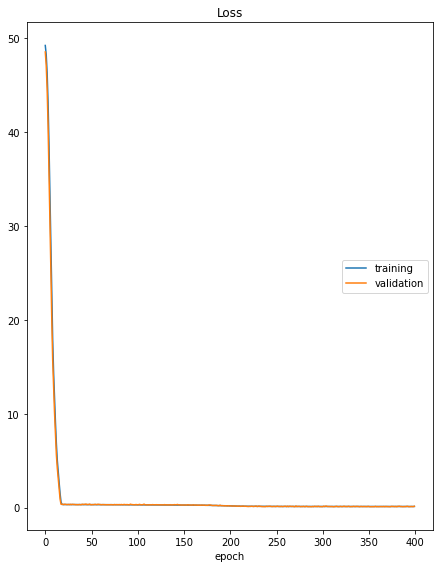

Loss
	training         	 (min:    0.108, max:   49.250, cur:    0.112)
	validation       	 (min:    0.083, max:   48.560, cur:    0.134)
127/127 [==============================] - 1s 5ms/step - loss: 0.1121 - val_loss: 0.1339
CPU times: user 4min 2s, sys: 49.7 s, total: 4min 52s
Wall time: 4min 22s


In [30]:
%%time
history = dnn_model_1.fit(
    train_features, train_labels,
    validation_split=0.1,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=400, batch_size = 32)

In [31]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:

loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 1']
loss_df.to_excel('Model_1.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 1']
val_loss_df.to_excel('val_Model_1.xlsx')

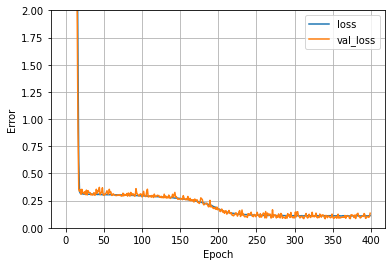

In [32]:
plot_loss(history)

Collect the results on the test set:

16/16 [==============================] - 0s 2ms/step


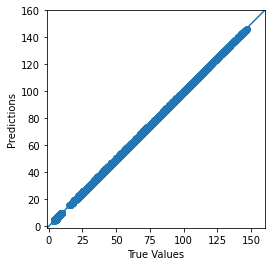

In [33]:
test_predictions = dnn_model_1.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-1, 160]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [34]:
test_predictions

array([[  5.797,  50.898,  84.024, ...,  22.129,   6.522,  48.957],
       [  6.257,  59.553,  98.226, ...,  25.885,   7.634,  57.266],
       [  5.239,  41.96 ,  69.191, ...,  18.236,   5.379,  40.345],
       ...,
       [  6.387,  62.018, 102.269, ...,  26.954,   7.951,  59.632],
       [  5.395,  44.418,  73.275, ...,  19.307,   5.693,  42.715],
       [  6.53 ,  64.706, 106.68 , ...,  28.121,   8.297,  62.212]],
      dtype=float32)

In [ ]:
# error = test_predictions - test_labels
# plt.hist(error, bins=5)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [35]:
dnn_model_1.save('dnn_model_1')

In [37]:
#reloaded = tf.keras.models.load_model('dnn_model_1')
test_results = {}


test_results['Model 1'] = dnn_model_1.evaluate(test_features, test_labels, verbose=1)

16/16 [==============================] - 0s 2ms/step - loss: 0.1425


In [38]:
pd.DataFrame(test_results, index=['RMSE']).T

,RMSE
Model 1,0.142485


#**Model 2**

In [39]:
def model_2(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),

      layers.Dense(16, activation='relu'),

      #layers.Dense(64, activation='relu'),

      #layers.Dense(64, activation='relu'),
      #layers.Dense(64, activation='relu'),
      # layers.Dense(128, activation='relu'),

      layers.Dense(42)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [40]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_2 = model_2(normalizer)
dnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 42)                714       
                                                                 
Total params: 1,057
Trainable params: 1,050
Non-trainable params: 7
_________________________________________________________________


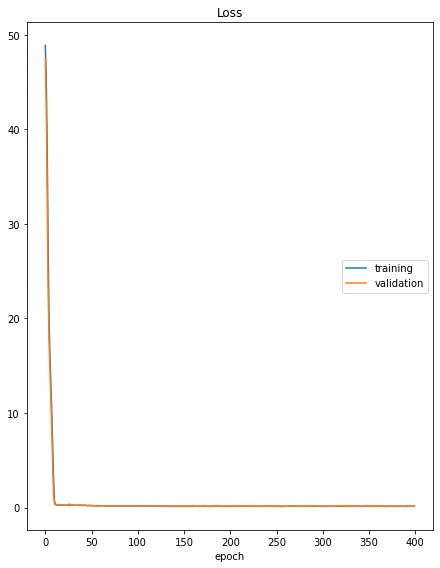

Loss
	training         	 (min:    0.138, max:   48.863, cur:    0.142)
	validation       	 (min:    0.082, max:   47.514, cur:    0.150)
127/127 [==============================] - 1s 4ms/step - loss: 0.1420 - val_loss: 0.1497
CPU times: user 4min 3s, sys: 49.4 s, total: 4min 52s
Wall time: 4min 22s


In [41]:
%%time
history = dnn_model_2.fit(
    train_features, train_labels,
    validation_split=0.1,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=400, batch_size = 32)

In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 2']
loss_df.to_excel('Model_2.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 2']
val_loss_df.to_excel('val_Model_2.xlsx')

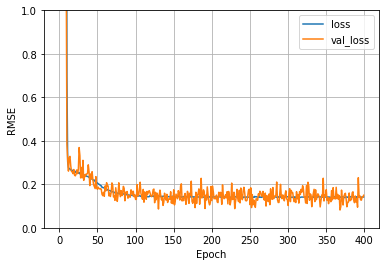

In [43]:
plot_loss(history)

16/16 [==============================] - 0s 2ms/step


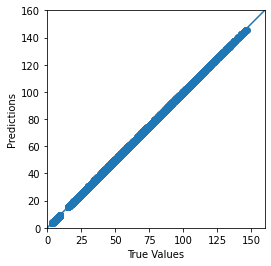

In [44]:
test_predictions = dnn_model_2.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 160]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [45]:
dnn_model_2.save('dnn_model_2')

In [46]:
# reloaded = tf.keras.models.load_model('dnn_model_2')


test_results['Model 2'] = dnn_model_2.evaluate(test_features, test_labels, verbose=1)

16/16 [==============================] - 0s 2ms/step - loss: 0.1579


In [47]:
pd.DataFrame(test_results, index=['RMSE']).T

,RMSE
Model 1,0.142485
Model 2,0.157897


# **Model 3**

In [48]:
def model_3(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8 , activation='relu'),

      layers.Dense(8, activation='relu'),

      layers.Dense(8, activation='relu'),

      #layers.Dense(128, activation='relu'),
      #layers.Dense(128, activation='relu'),
 
      layers.Dense(42)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [49]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_3 = model_3(normalizer)
dnn_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 8)                 32        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 42)                378       
                                                                 
Total params: 561
Trainable params: 554
Non-trainable params: 7
________________________________________________________

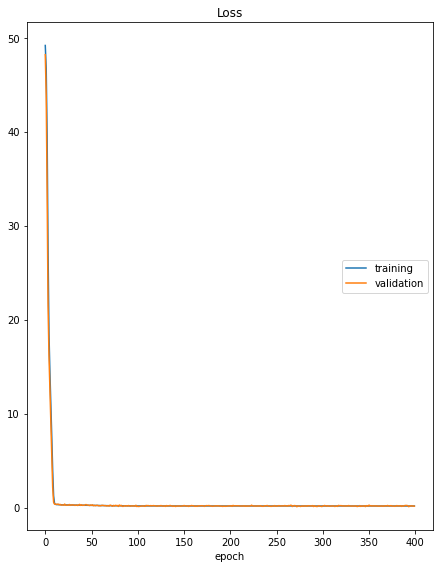

Loss
	training         	 (min:    0.165, max:   49.176, cur:    0.166)
	validation       	 (min:    0.088, max:   48.195, cur:    0.150)
127/127 [==============================] - 1s 4ms/step - loss: 0.1665 - val_loss: 0.1505
CPU times: user 4min 4s, sys: 49.6 s, total: 4min 53s
Wall time: 4min 22s


In [50]:
%%time
history = dnn_model_3.fit(
    train_features, train_labels,
    validation_split=0.1,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=400, batch_size = 32)

In [51]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 6])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 3']
loss_df.to_excel('Model_3.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 3']
val_loss_df.to_excel('val_Model_3.xlsx')

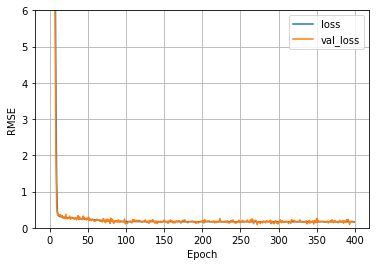

In [52]:
plot_loss(history)

16/16 [==============================] - 0s 2ms/step


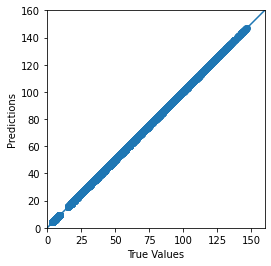

In [53]:
test_predictions = dnn_model_3.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 160]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - Cl_test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [54]:
dnn_model_3.save('dnn_model_3')

In [55]:
#reloaded = tf.keras.models.load_model('dnn_model_3')


test_results['Model 3'] = dnn_model_3.evaluate(test_features, test_labels, verbose=1)

16/16 [==============================] - 0s 2ms/step - loss: 0.1500


In [56]:
pd.DataFrame(test_results, index=['RMSE']).T

,RMSE
Model 1,0.142485
Model 2,0.157897
Model 3,0.149983


#**Model 4**

In [ ]:
def model_4(norm):
  model = keras.Sequential([
      norm,


      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(1)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [ ]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_4 = model_4(normalizer)
dnn_model_4.summary()

In [ ]:
%%time
history = dnn_model_4.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=300, batch_size = 25)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 4']
loss_df.to_excel('Model_4.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 4']
val_loss_df.to_excel('val_Model_4.xlsx')

In [ ]:
plot_loss(history)

In [ ]:
test_predictions = dnn_model_4.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - Cl_test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [ ]:
dnn_model_4.save('dnn_model_4')

In [ ]:
#reloaded = tf.keras.models.load_model('dnn_model_4')


test_results['Model 4'] = dnn_model_4.evaluate(test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

#**Model 5**

In [ ]:
def model_5(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      # layers.Dense(128, activation='relu'),

      layers.Dense(1)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [ ]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_5 = model_5(normalizer)
dnn_model_5.summary()

In [ ]:
%%time
history = dnn_model_5.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=300, batch_size = 25)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 5']
loss_df.to_excel('Model_5.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 5']
val_loss_df.to_excel('val_Model_5.xlsx')

In [ ]:
plot_loss(history)

In [ ]:
test_predictions = dnn_model_5.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - Cl_test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [ ]:
dnn_model_5.save('dnn_model_5')

In [ ]:
#reloaded = tf.keras.models.load_model('dnn_model_5')


test_results['Model 5'] = dnn_model_5.evaluate(test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

#**Loss DataFrame**

In [ ]:
d1 = pd.read_excel('/content/Model_1.xlsx', index_col = 0)
d2 = pd.read_excel('/content/Model_2.xlsx', index_col = 0)
d3 = pd.read_excel('/content/Model_3.xlsx', index_col = 0)
d4 = pd.read_excel('/content/Model_4.xlsx', index_col = 0)
d5 = pd.read_excel('/content/Model_5.xlsx', index_col = 0)

In [ ]:
l = pd.concat([d1, d2, d3, d4, d5],axis=1)

In [ ]:
l.to_excel("loss.xls")

In [ ]:
d1 = pd.read_excel('/content/val_Model_1.xlsx', index_col = 0)
d2 = pd.read_excel('/content/val_Model_2.xlsx', index_col = 0)
d3 = pd.read_excel('/content/val_Model_3.xlsx', index_col = 0)
d4 = pd.read_excel('/content/val_Model_4.xlsx', index_col = 0)
d5 = pd.read_excel('/content/val_Model_5.xlsx', index_col = 0)

In [ ]:
l = pd.concat([d1, d2, d3, d4, d5],axis=1)

In [ ]:
l.to_excel("val_loss.xls")

# validation

In [ ]:
exp = pd.read_excel('/content/validation_data - for_pred.xlsx')
del exp['cl']
exp.head(42)

In [ ]:
#test_predictions = dnn_model_1.predict(exp.iloc[:,0:2]).flatten()
test_predictions = dnn_model_2.predict(exp.iloc[:,0:3])
test_predictions
a = plt.axes(aspect='equal')
plt.scatter(exp.iloc[:,3], test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0.08, 1.1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
dnn_model_2.evaluate(exp.iloc[:,0:3], exp.iloc[:,3], verbose=1)


In [ ]:

predcl = pd.DataFrame(test_predictions)
predcl.head()
adding = exp.iloc[:,0:4]
adding

adding['pred_cd'] = predcl.iloc[:,0:3].values

adding.to_excel('ml_cd_model2.xls')

In [ ]:
0.0172, 0.0263, 0.0199, 0.0283, 0.0142

NACA 0012

In [ ]:
plt.scatter(adding.iloc[0:16,2], adding.iloc[0:16,3])
plt.scatter(adding.iloc[0:16,2], adding.iloc[0:16,4])

NACA 0015

In [ ]:
plt.scatter(adding.iloc[17:32,2], adding.iloc[17:32,3])
plt.scatter(adding.iloc[17:32,2], adding.iloc[17:32,4])

NACA 0018

In [ ]:
plt.scatter(adding.iloc[33:49,2], adding.iloc[33:49,3])
plt.scatter(adding.iloc[33:49,2], adding.iloc[33:49,4])